In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [71]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

In [72]:
df

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10
...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50


In [73]:
df.describe()

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,32.433825,18.414002,14.316892,87.846242,47.084925,68.994602,269.090489
std,36.211287,27.666459,15.064466,94.951663,71.422794,113.328362,180.713964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.130000
25%,7.000000,11.400000,3.690000,35.800000,13.600000,5.500000,151.377500
50%,14.100000,13.600000,6.500000,79.600000,21.500000,12.300000,208.180000
75%,56.800000,20.100000,22.500000,103.000000,51.600000,89.000000,336.000000
max,793.000000,980.000000,132.000000,971.000000,1641.000000,1120.000000,2037.000000


In [74]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour
df.drop('Time', inplace=True, axis=1)

In [75]:
df

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Year,Month,Day,Hour
0,27.4,41.8,53.7,89.6,18.60,498.0,729.10,2017,1,3,13
1,21.6,37.5,50.9,64.6,61.90,500.0,736.50,2017,1,3,14
2,18.5,37.4,60.1,64.2,16.50,480.0,676.70,2017,1,3,15
3,29.7,38.0,52.6,43.2,19.80,390.0,573.30,2017,1,3,16
4,16.7,38.1,56.7,42.4,15.20,373.0,542.10,2017,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...
43819,59.3,17.9,16.6,115.0,12.70,344.0,565.50,2022,1,3,8
43820,71.9,20.6,33.1,149.0,11.90,399.0,685.50,2022,1,3,9
43821,90.5,30.9,47.8,157.0,12.90,397.0,736.10,2022,1,3,10
43822,94.0,33.9,52.2,155.0,15.40,345.0,695.50,2022,1,3,11


In [76]:
df1_train = df.loc[(df['Year'].isin([2017,2018]))&(df['Month'].isin([6,7,8,9]))]
df1_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8,9]))]

print('df_train.shape: ', df1_train.shape)
print('df_test.shape: ', df1_test.shape)


df_train.shape:  (5856, 11)
df_test.shape:  (2928, 11)


In [77]:
# conda install tensorflow

In [78]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies  # without the dependencies if you already have TF/Numpy.

In [79]:
from tcn import TCN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [80]:
X_train1 = df1_train[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_train1 = df1_train[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
X_test1 = df1_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df1_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(5856, 5) (5856, 6) (2928, 5) (2928, 6)


In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [82]:
model = Sequential()
model.add(TCN(
      input_shape = (5,1),
      nb_filters=64,
      dilations=(1, 2, 4, 8, 16, 32),
      activation='relu',
      padding='causal',       
))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6))

model.summary()

model.compile(loss='mae', optimizer='adam')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_2 (TCN)                 (None, 64)                136256    
                                                                 
 dense_10 (Dense)            (None, 500)               32500     
                                                                 
 dense_11 (Dense)            (None, 500)               250500    
                                                                 
 dense_12 (Dense)            (None, 500)               250500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 6)                 3006      
                                                                 
Total params: 923,262
Trainable params: 923,262
Non-tr

In [83]:

model.fit(X_train1, y_train1, epochs=50, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/50
156/156 [==============================] - 13s 70ms/step - loss: 12.4384 - val_loss: 19.0024
Epoch 2/50
156/156 [==============================] - 10s 66ms/step - loss: 9.1679 - val_loss: 20.7669
Epoch 3/50
156/156 [==============================] - 11s 68ms/step - loss: 8.6298 - val_loss: 19.0814
Epoch 4/50
156/156 [==============================] - 8s 50ms/step - loss: 8.4052 - val_loss: 20.2546
Epoch 5/50
156/156 [==============================] - 6s 39ms/step - loss: 8.3177 - val_loss: 21.3902
Epoch 6/50
156/156 [==============================] - 6s 40ms/step - loss: 8.2761 - val_loss: 19.7208
Epoch 7/50
156/156 [==============================] - 6s 40ms/step - loss: 8.2049 - val_loss: 17.8919
Epoch 8/50
156/156 [==============================] - 6s 39ms/step - loss: 8.1406 - val_loss: 18.1890
Epoch 9/50
156/156 [==============================] - 6s 40ms/step - loss: 8.0890 - val_loss: 21.5145
Epoch 10/50
156/156 [==============================] - 6s 39ms/step - loss: 8.

In [84]:
pred = model.predict(X_test1)


In [85]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

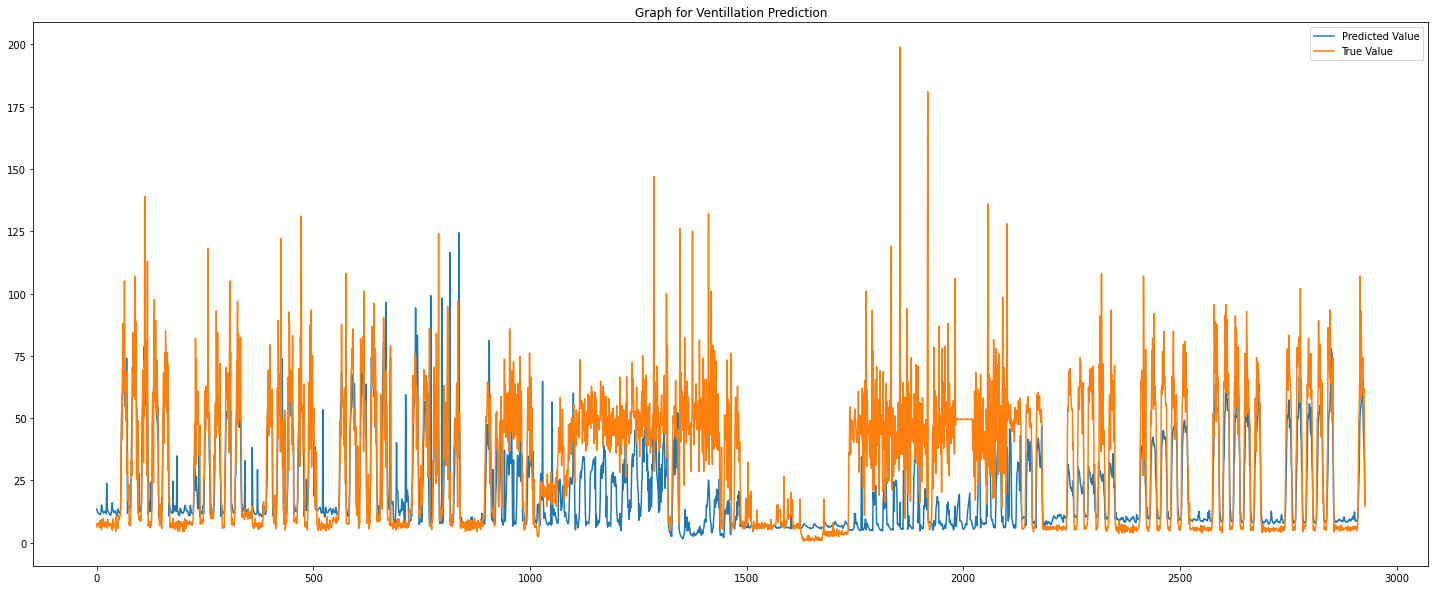

In [86]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [87]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

Mean Absolute Error is:  16.192268896907404


In [88]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

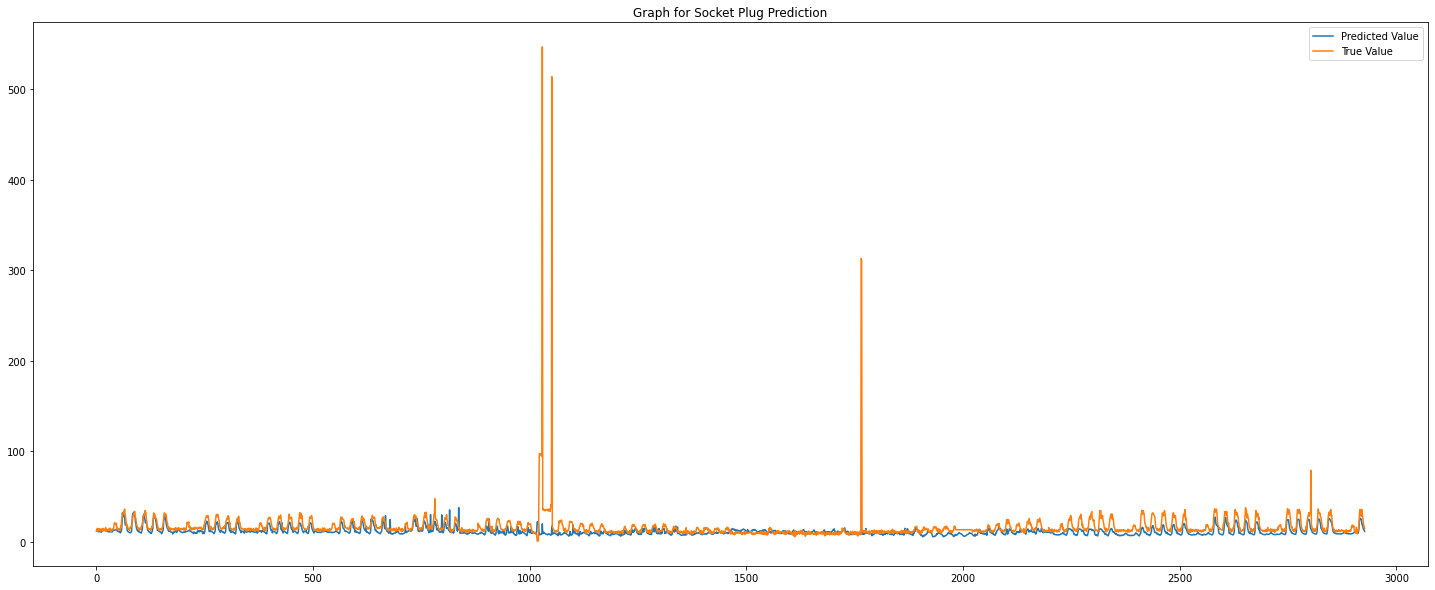

In [89]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [90]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

Mean Absolute Error is:  5.682337965935305


In [91]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

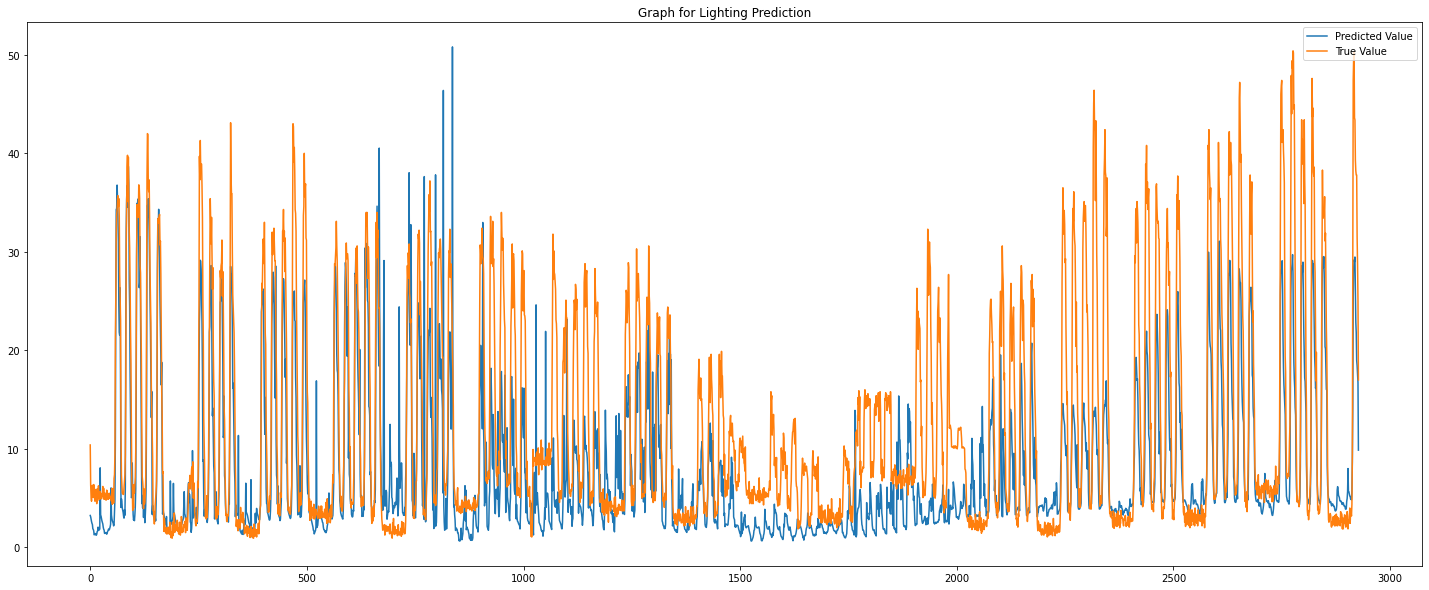

In [92]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [93]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

Mean Absolute Error is:  5.506493602291808


In [94]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

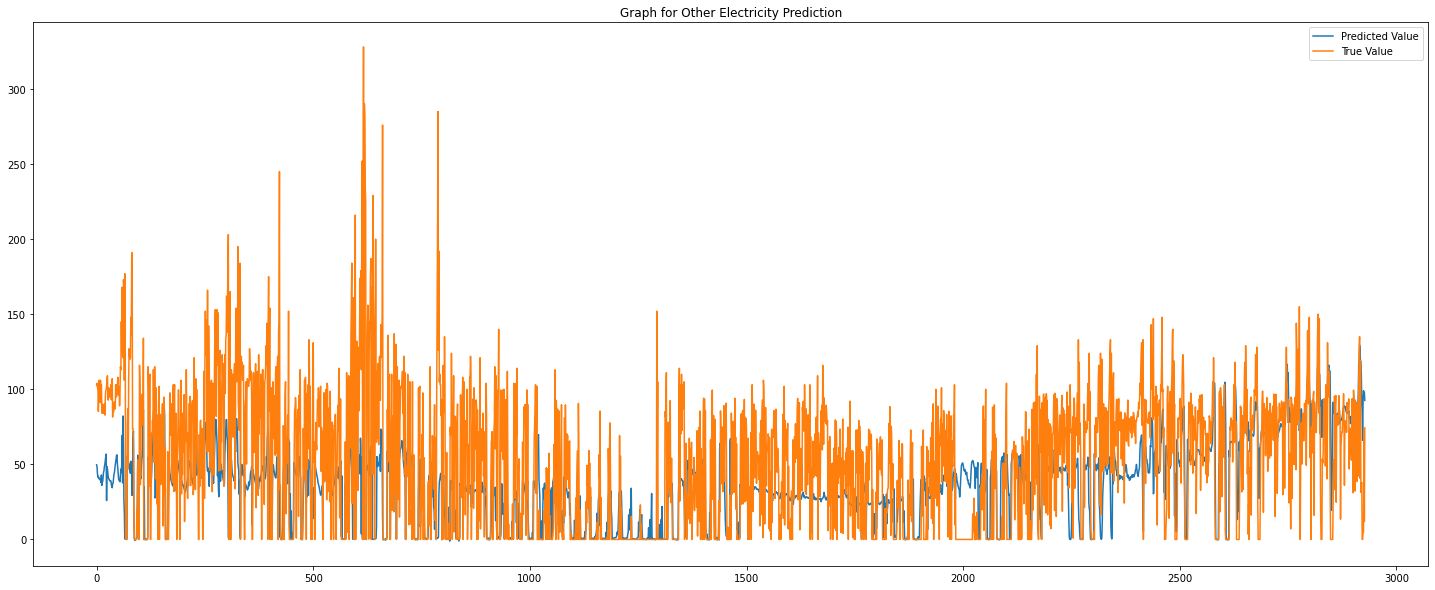

In [95]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [96]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

Mean Absolute Error is:  31.06375914340763


In [97]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

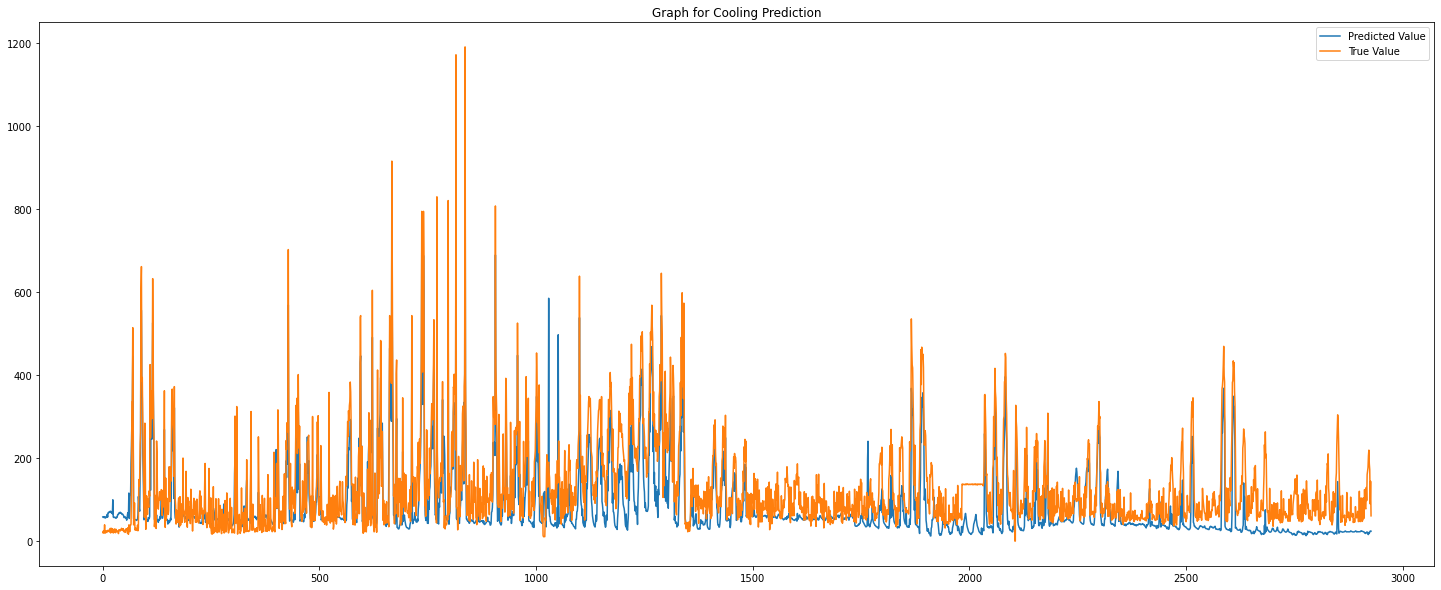

In [98]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [99]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

Mean Absolute Error is:  56.16323748813952


In [100]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

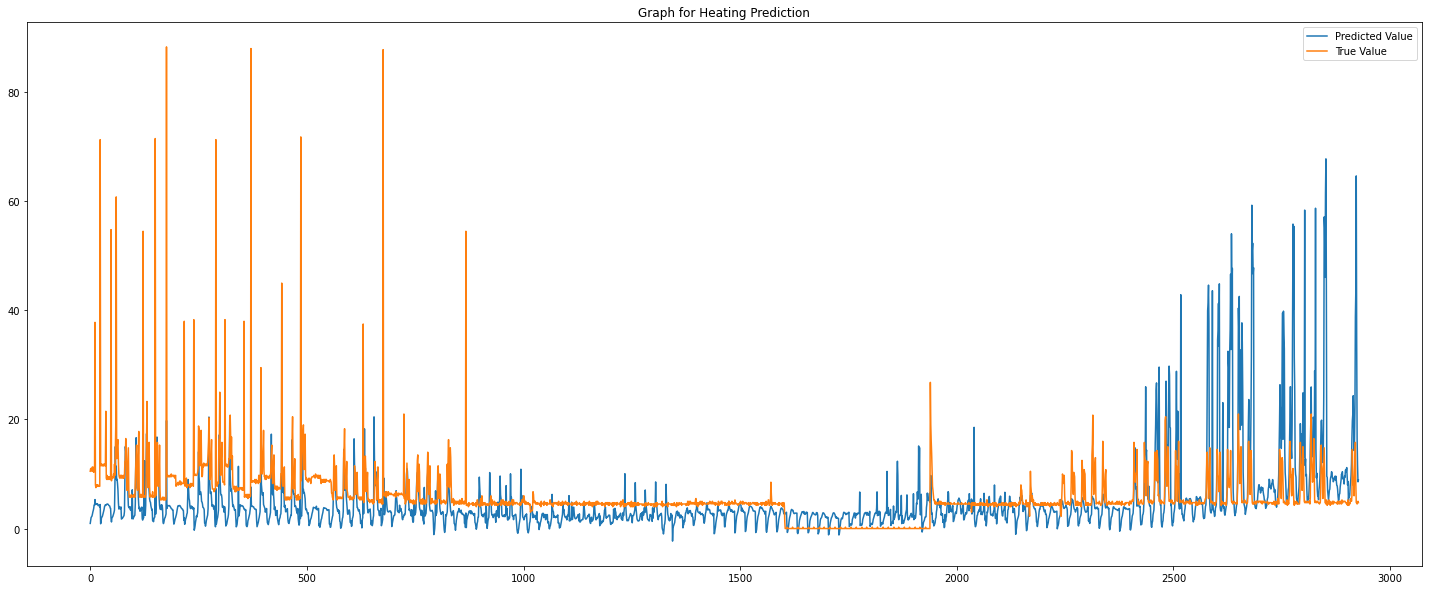

In [101]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [102]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(heat_test,heat_pred))

Mean Absolute Error is:  4.135388786377783
